In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.drop(columns=['Family'],inplace = True)

In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [6]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [9]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [10]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,NaN,41.0
435,14.0,120.0000,14.0


In [11]:
X_train['Age_imputed']

331    45.5
733    23.0
382    32.0
704    26.0
813     6.0
       ... 
106    21.0
270     NaN
860    41.0
435    14.0
102    21.0
Name: Age_imputed, Length: 712, dtype: float64

In [12]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

29    NaN
55    NaN
533   NaN
495   NaN
468   NaN
       ..
330   NaN
214   NaN
466   NaN
121   NaN
270   NaN
Name: Age_imputed, Length: 140, dtype: float64

In [13]:
X_train['Age'].dropna()

331    45.5
733    23.0
382    32.0
704    26.0
813     6.0
       ... 
71     16.0
106    21.0
860    41.0
435    14.0
102    21.0
Name: Age, Length: 572, dtype: float64

In [17]:
df['Age'].sample(X_train['Age'].isnull().sum()).values

array([22.  , 41.  ,  1.  , 21.  , 25.  ,  1.  , 36.  ,  2.  ,  0.67,
       19.  , 42.  , 30.  , 27.  , 45.  , 50.  , 31.  ,   nan, 33.  ,
         nan, 15.  ,   nan,   nan,   nan, 19.  , 33.  , 21.  , 21.  ,
         nan, 15.  , 50.  , 44.  , 37.  , 21.  , 54.  , 36.  , 32.  ,
       31.  , 16.  , 36.  ,  2.  , 17.  , 28.  , 36.  , 28.  ,   nan,
       31.  , 61.  , 38.  , 35.  , 40.  ,  9.  , 21.  , 18.  ,   nan,
       25.  , 10.  , 23.  , 39.  ,   nan, 46.  ,  1.  , 37.  , 25.  ,
       21.  , 30.  , 16.  , 28.  , 56.  , 28.  , 48.  , 43.  , 19.  ,
         nan, 54.  , 28.  ,   nan, 36.  , 18.  , 35.  ,   nan, 29.  ,
       18.  , 40.  , 31.  ,   nan, 19.  , 29.  , 46.  ,   nan, 22.  ,
       44.  ,   nan, 49.  , 39.  , 24.  , 30.  , 20.  ,   nan,   nan,
       19.  ,   nan, 51.  , 27.  , 17.  , 24.  ,   nan, 55.5 , 39.  ,
        9.  ,   nan,  9.  , 29.  , 30.  , 21.  ,   nan,  8.  , 35.  ,
       26.  , 60.  , 35.  , 13.  , 33.  ,  4.  , 24.  ,  1.  ,   nan,
       16.  ,  1.  ,

In [18]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4720\500413249.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [19]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,56.0
860,41.0,NaN,41.0
435,14.0,120.0000,14.0


In [20]:
X_train.isnull().sum()

Age            140
Fare            36
Age_imputed      0
dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4720\1112548176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4720\1112548176.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['A

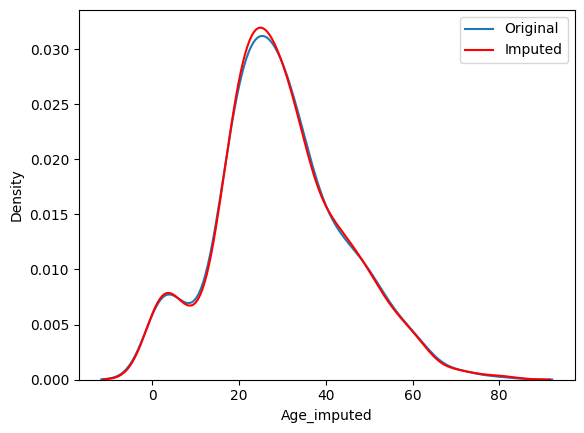

In [25]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False,color = 'red')
plt.legend()

In [27]:
print("Original Variance",X_train['Age'].var())
print("imputed Variance",X_train['Age_imputed'].var())

Original Variance 210.2517072477435
imputed Variance 210.76035285244708


In [28]:
X_train.cov()

,Age,Fare,Age_imputed
Age,210.251707,75.481375,210.251707
Fare,75.481375,2761.031435,57.737523
Age_imputed,210.251707,57.737523,210.760353


In [29]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2761.031435,75.481375,57.737523
Age,75.481375,210.251707,210.251707
Age_imputed,57.737523,210.251707,210.760353


<Axes: >

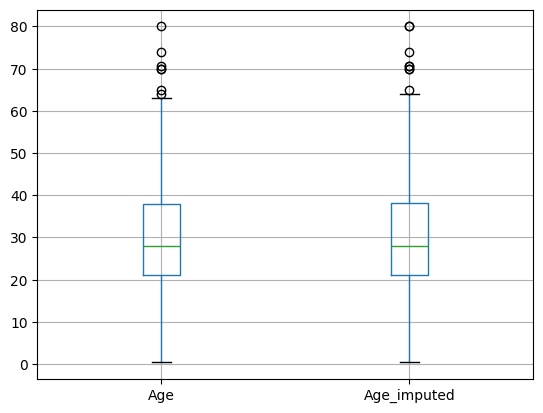

In [30]:
X_train[['Age','Age_imputed']].boxplot()

##### if both user enter same fare and doesnot enter age according to model for both user it will predict different output, so we need to do somtthing that is there is same fare it will give same output as previous

In [31]:
sample_value = X_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

## Working with Catagorical data

In [35]:
data = pd.read_csv('house-train.csv',usecols=['FireplaceQu','GarageQual','SalePrice'])

In [36]:
data.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [37]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [38]:
X=data
y=data['SalePrice']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1168, 3), (292, 3))

In [40]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [41]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,145000,TA,NaN
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,NaN,NaN
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd


In [45]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4720\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'

In [49]:
temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(df)
],axis=1)
temp.columns=['original','imputed']

In [50]:
temp

,original,imputed
TA,0.951087,1.246914
Fa,0.032609,0.042649
Gd,0.011775,0.014590
Ex,0.002717,0.003367
Po,0.001812,0.003367


In [54]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
],axis=1)
temp.columns=['original','imputed']

In [55]:
temp

,original,imputed
Gd,0.491143,0.500000
TA,0.405797,0.399829
Fa,0.043478,0.041952
Ex,0.033816,0.030822
Po,0.025765,0.027397


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4720\2931669829.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4720\2931669829.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

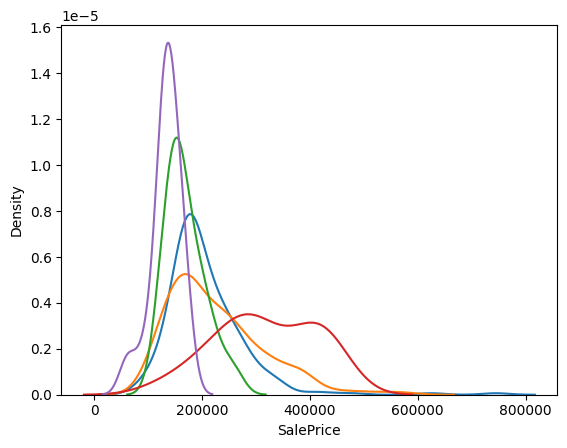

In [59]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4720\1641093395.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4720\1641093395.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

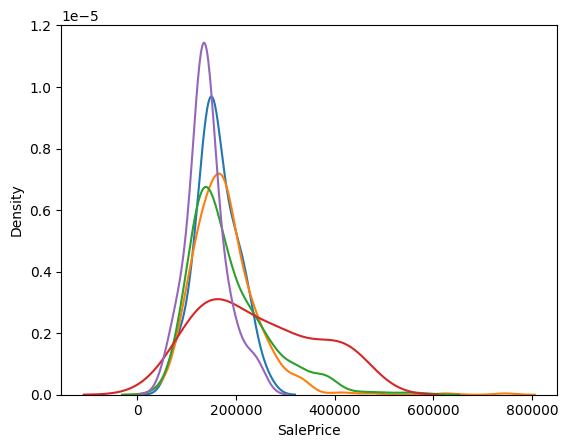

In [60]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show()